# Machine Learning Assignment 1

Muhammad Ghulam Abbas (29417) and Muhammad Adnan Ali(29401)

# k Nearest Neighbours 


 In this project, I build a k Nearest Neighbours  for Wine Quality Prediction. I have used the wine dataset downloaded from the UCI Machine Learning Repository.

# Dataset Description

The data set can be found at the following url:-

https://archive.ics.uci.edu/dataset/186/wine+quality

1.fixed acidity           
2.volatile acidity        
3.citric acid             
4.residual sugar          
5.chlorides               
6.free sulfur dioxide     
7.total sulfur dioxide    
8.density                 
9.pH                      
10.sulphates               
11.alcohol                 
12.quality   

# Import packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = r'C:/Users/lenovo1/Downloads/archive (5)/winequality-red.csv'
df = pd.read_csv(data, header=None)

In [3]:
df.shape


(1600, 12)

In [4]:
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6


# Data cleaning


In [5]:
col_names = [
    'Fixed Acidity',
    'Volatile Acidity',
    'Citric Acid',
    'Residual Sugar',
    'Chlorides',
    'Free Sulfur Dioxide',
    'Total Sulfur Dioxide',
    'Density',
    'pH',
    'Sulphates',
    'Alcohol',
    'Quality'
]
df.columns = col_names


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Fixed Acidity         1600 non-null   object
 1   Volatile Acidity      1600 non-null   object
 2   Citric Acid           1600 non-null   object
 3   Residual Sugar        1600 non-null   object
 4   Chlorides             1600 non-null   object
 5   Free Sulfur Dioxide   1600 non-null   object
 6   Total Sulfur Dioxide  1600 non-null   object
 7   Density               1600 non-null   object
 8   pH                    1600 non-null   object
 9   Sulphates             1600 non-null   object
 10  Alcohol               1600 non-null   object
 11  Quality               1600 non-null   object
dtypes: object(12)
memory usage: 150.1+ KB


In [7]:
df.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6


In [8]:
df.isnull().sum()

Fixed Acidity           0
Volatile Acidity        0
Citric Acid             0
Residual Sugar          0
Chlorides               0
Free Sulfur Dioxide     0
Total Sulfur Dioxide    0
Density                 0
pH                      0
Sulphates               0
Alcohol                 0
Quality                 0
dtype: int64

In [9]:
df.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600
unique,97,144,81,92,154,61,145,437,90,97,66,7
top,7.2,0.6,0.0,2.0,0.08,6.0,28.0,0.9972,3.3,0.6,9.5,5
freq,67,47,132,156,66,138,43,36,57,69,139,681


In [10]:

columns_to_convert = ['Fixed Acidity', 'Residual Sugar', 'Chlorides', 'Free Sulfur Dioxide',
                      'Total Sulfur Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol','Citric Acid' ]

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Quality'] = pd.to_numeric(df['Quality'], errors='coerce')


# Exploratory Data Analysis 

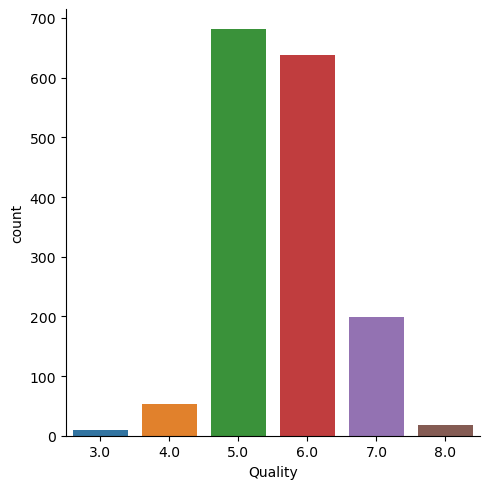

In [11]:
# number of values for each quality
sns.catplot(x='Quality', data = df, kind = 'count')

In [12]:
df.dtypes

Fixed Acidity           float64
Volatile Acidity         object
Citric Acid             float64
Residual Sugar          float64
Chlorides               float64
Free Sulfur Dioxide     float64
Total Sulfur Dioxide    float64
Density                 float64
pH                      float64
Sulphates               float64
Alcohol                 float64
Quality                 float64
dtype: object

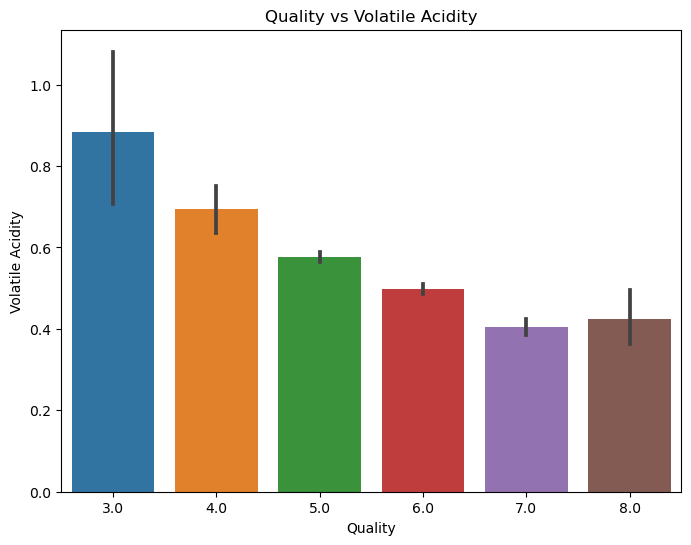

In [13]:

df['Quality'] = pd.to_numeric(df['Quality'], errors='coerce')
df['Volatile Acidity'] = pd.to_numeric(df['Volatile Acidity'], errors='coerce')

df = df.dropna(subset=['Quality', 'Volatile Acidity'])

plt.figure(figsize=(8, 6))
sns.barplot(x='Quality', y='Volatile Acidity', data=df)
plt.title('Quality vs Volatile Acidity')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.show()


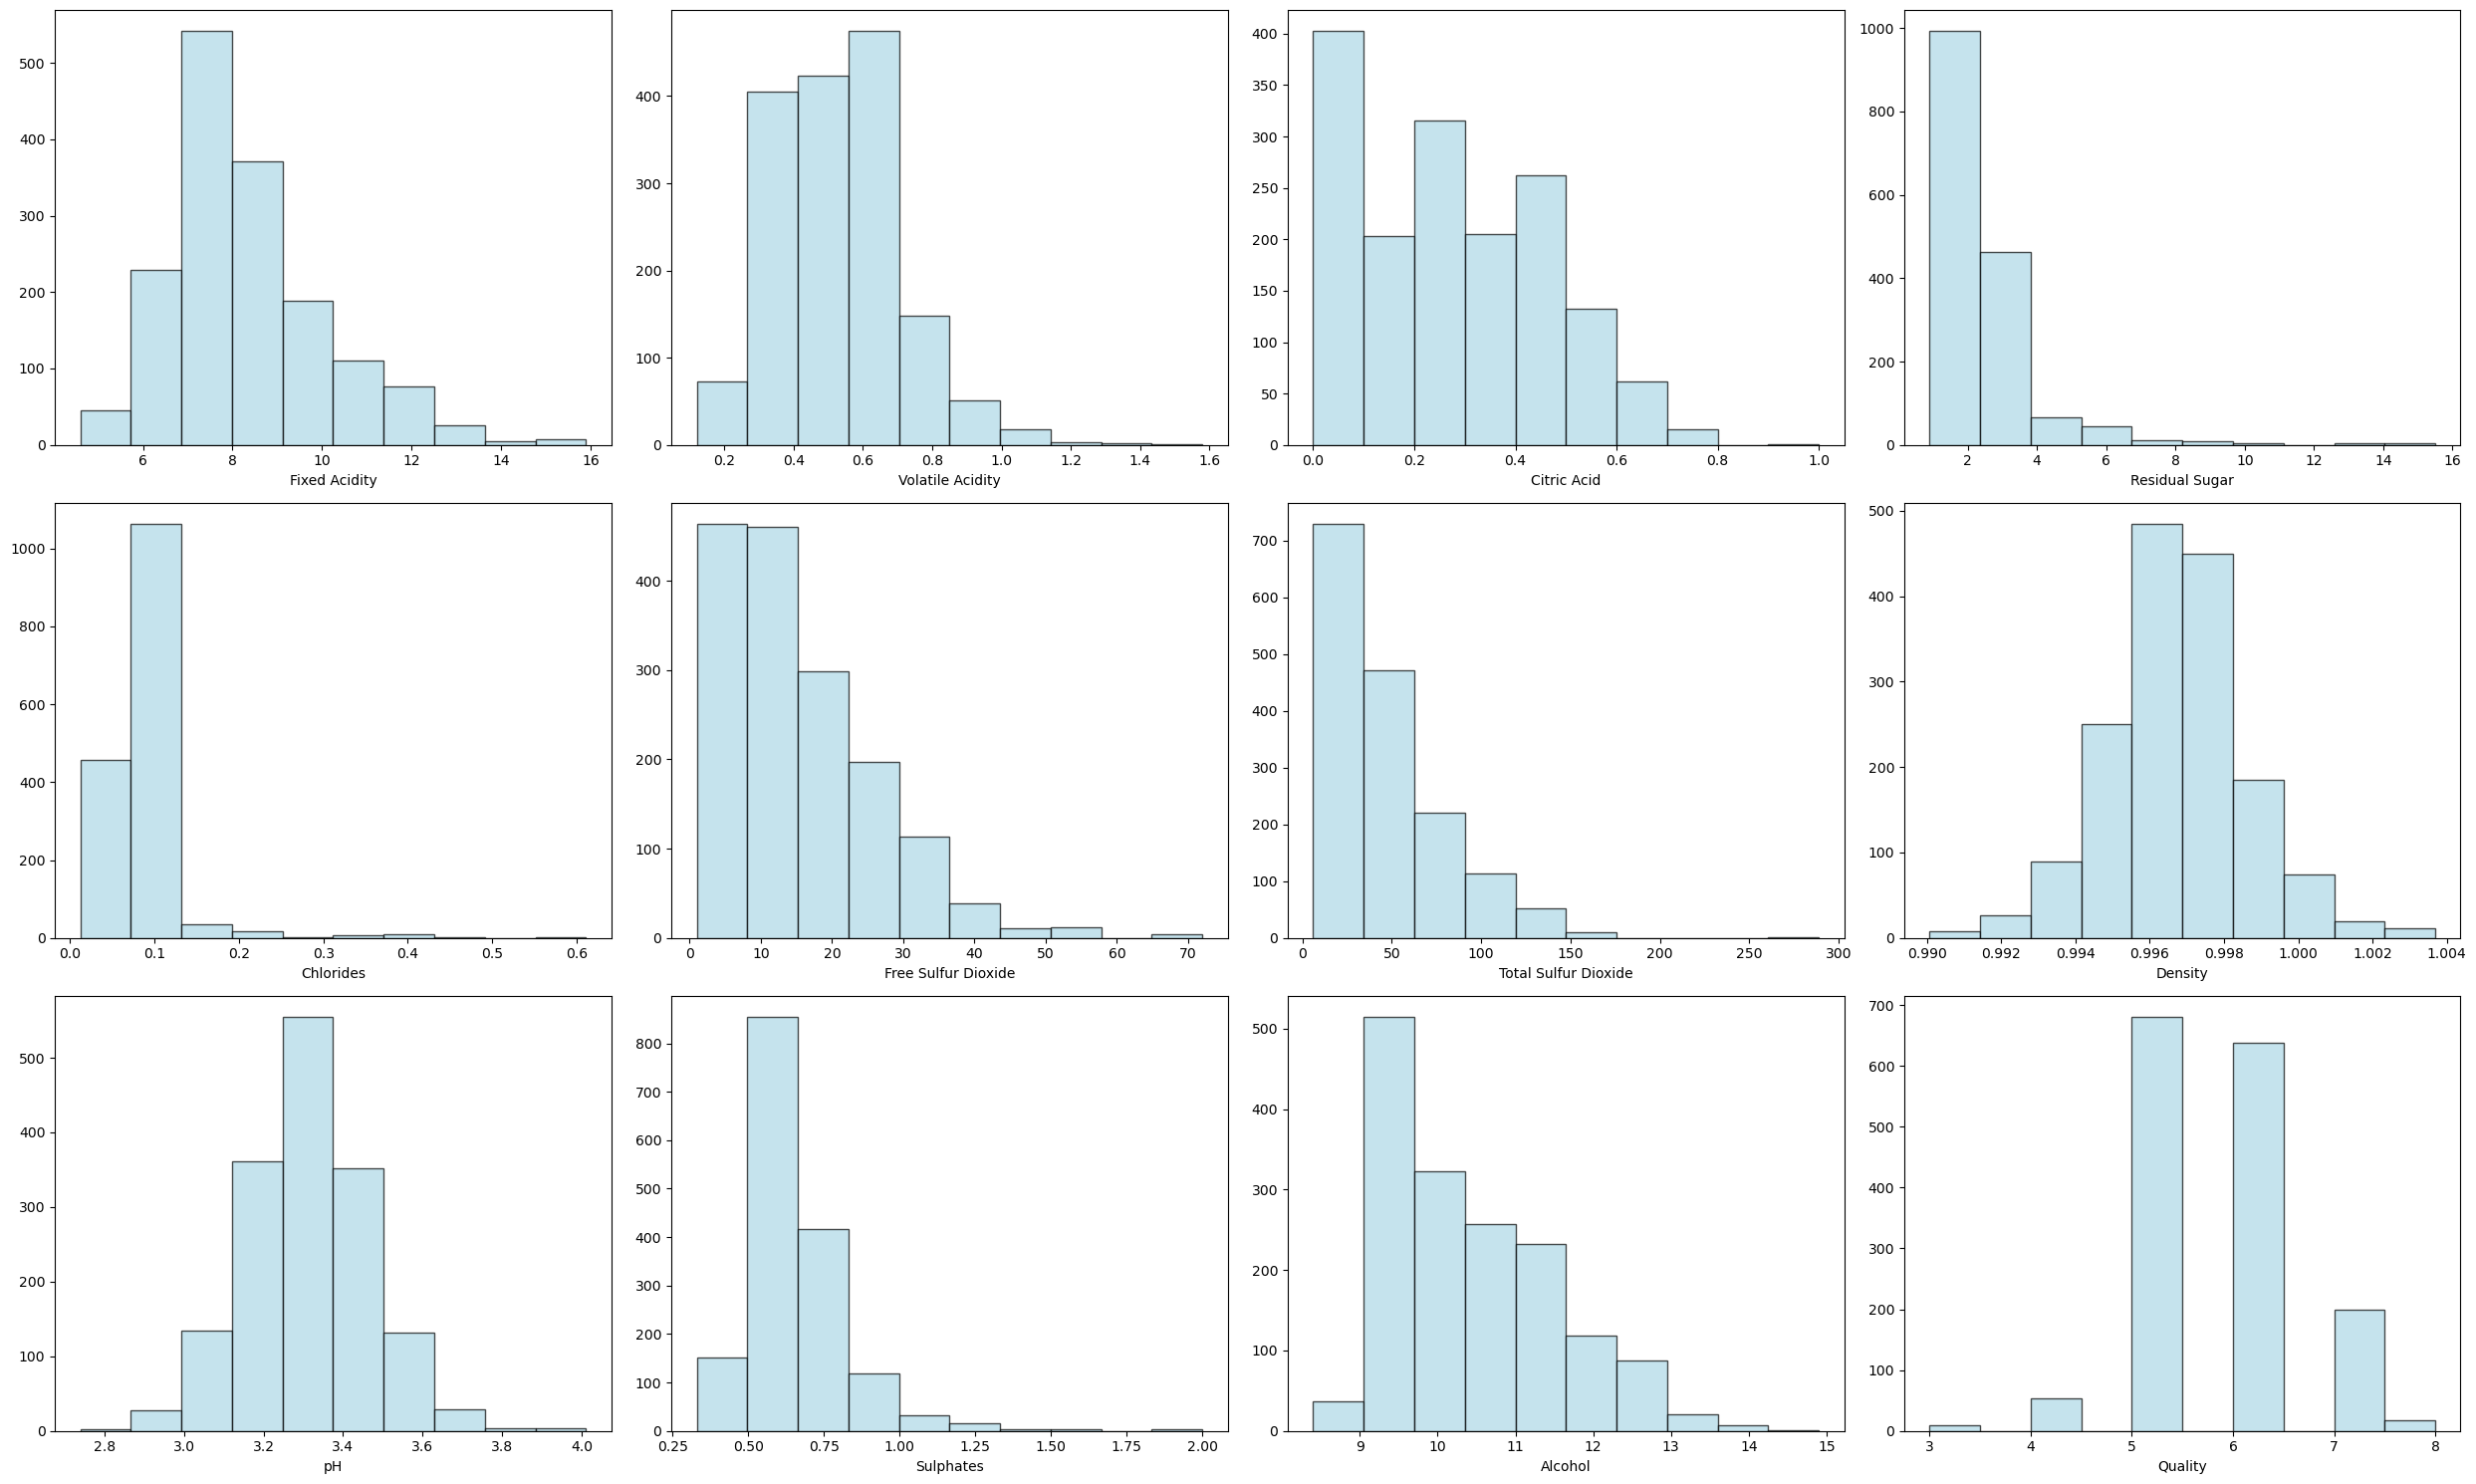

In [14]:
plt.figure(figsize=(25, 15))

for i, col_name in enumerate(col_names, start=1):
    plt.subplot(3, 4, i)
    plt.hist(df[col_name], color='lightblue', edgecolor='black', alpha=0.7)
    plt.xlabel(col_name)

plt.tight_layout()
plt.show()

We can see that all the variables in the dataset are  right-side skewed.  skewed.


In [15]:
df.describe().iloc[:,1:9].T[['mean','50%']]


,mean,50%
Volatile Acidity,0.527821,0.52000
Citric Acid,0.270976,0.26000
Residual Sugar,2.538806,2.20000
Chlorides,0.087467,0.07900
Free Sulfur Dioxide,15.874922,14.00000
Total Sulfur Dioxide,46.467792,38.00000
Density,0.996747,0.99675
pH,3.311113,3.31000


The dataset demonstrates sufficient skewness in residual sugar, chlorides and sulphates.

# CORRELATION:-

In [16]:
corr = df.corr()
corr_values = corr['Quality'].sort_values().round(3)
corr_values

Volatile Acidity       -0.391
Total Sulfur Dioxide   -0.185
Density                -0.175
Chlorides              -0.129
pH                     -0.058
Free Sulfur Dioxide    -0.051
Residual Sugar          0.014
Fixed Acidity           0.124
Citric Acid             0.226
Sulphates               0.251
Alcohol                 0.476
Quality                 1.000
Name: Quality, dtype: float64

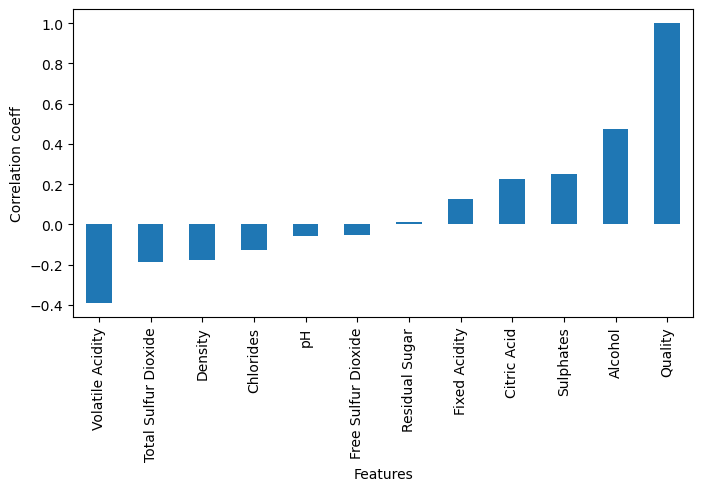

In [17]:
plt.figure(figsize=(8,4))
corr_values.plot.bar()
plt.xlabel('Features')
plt.ylabel('Correlation coeff')
plt.show()

In [18]:
corr.round(2)


,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
Fixed Acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
Volatile Acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
Citric Acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
Residual Sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
Chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
Free Sulfur Dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
Total Sulfur Dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
Density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
Sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


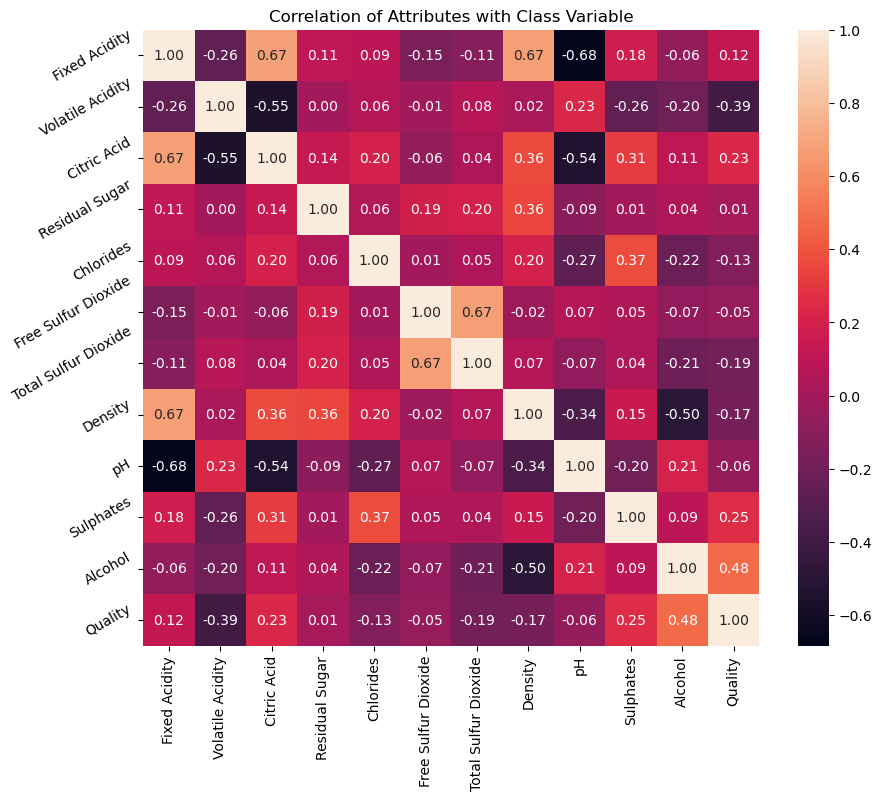

In [19]:
plt.figure(figsize=(10, 8))
plt.title('Correlation of Attributes with Class Variable')

correlation = df.corr()

heatmap = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30)

plt.show()

# Interpretation

From the above correlation heat map, we can conclude that :-

Class is highly positive correlated with Alcohol and sulphates.

Class is weakly positive correlated with Volatile Acidity



# Detecting outliers and anomalies

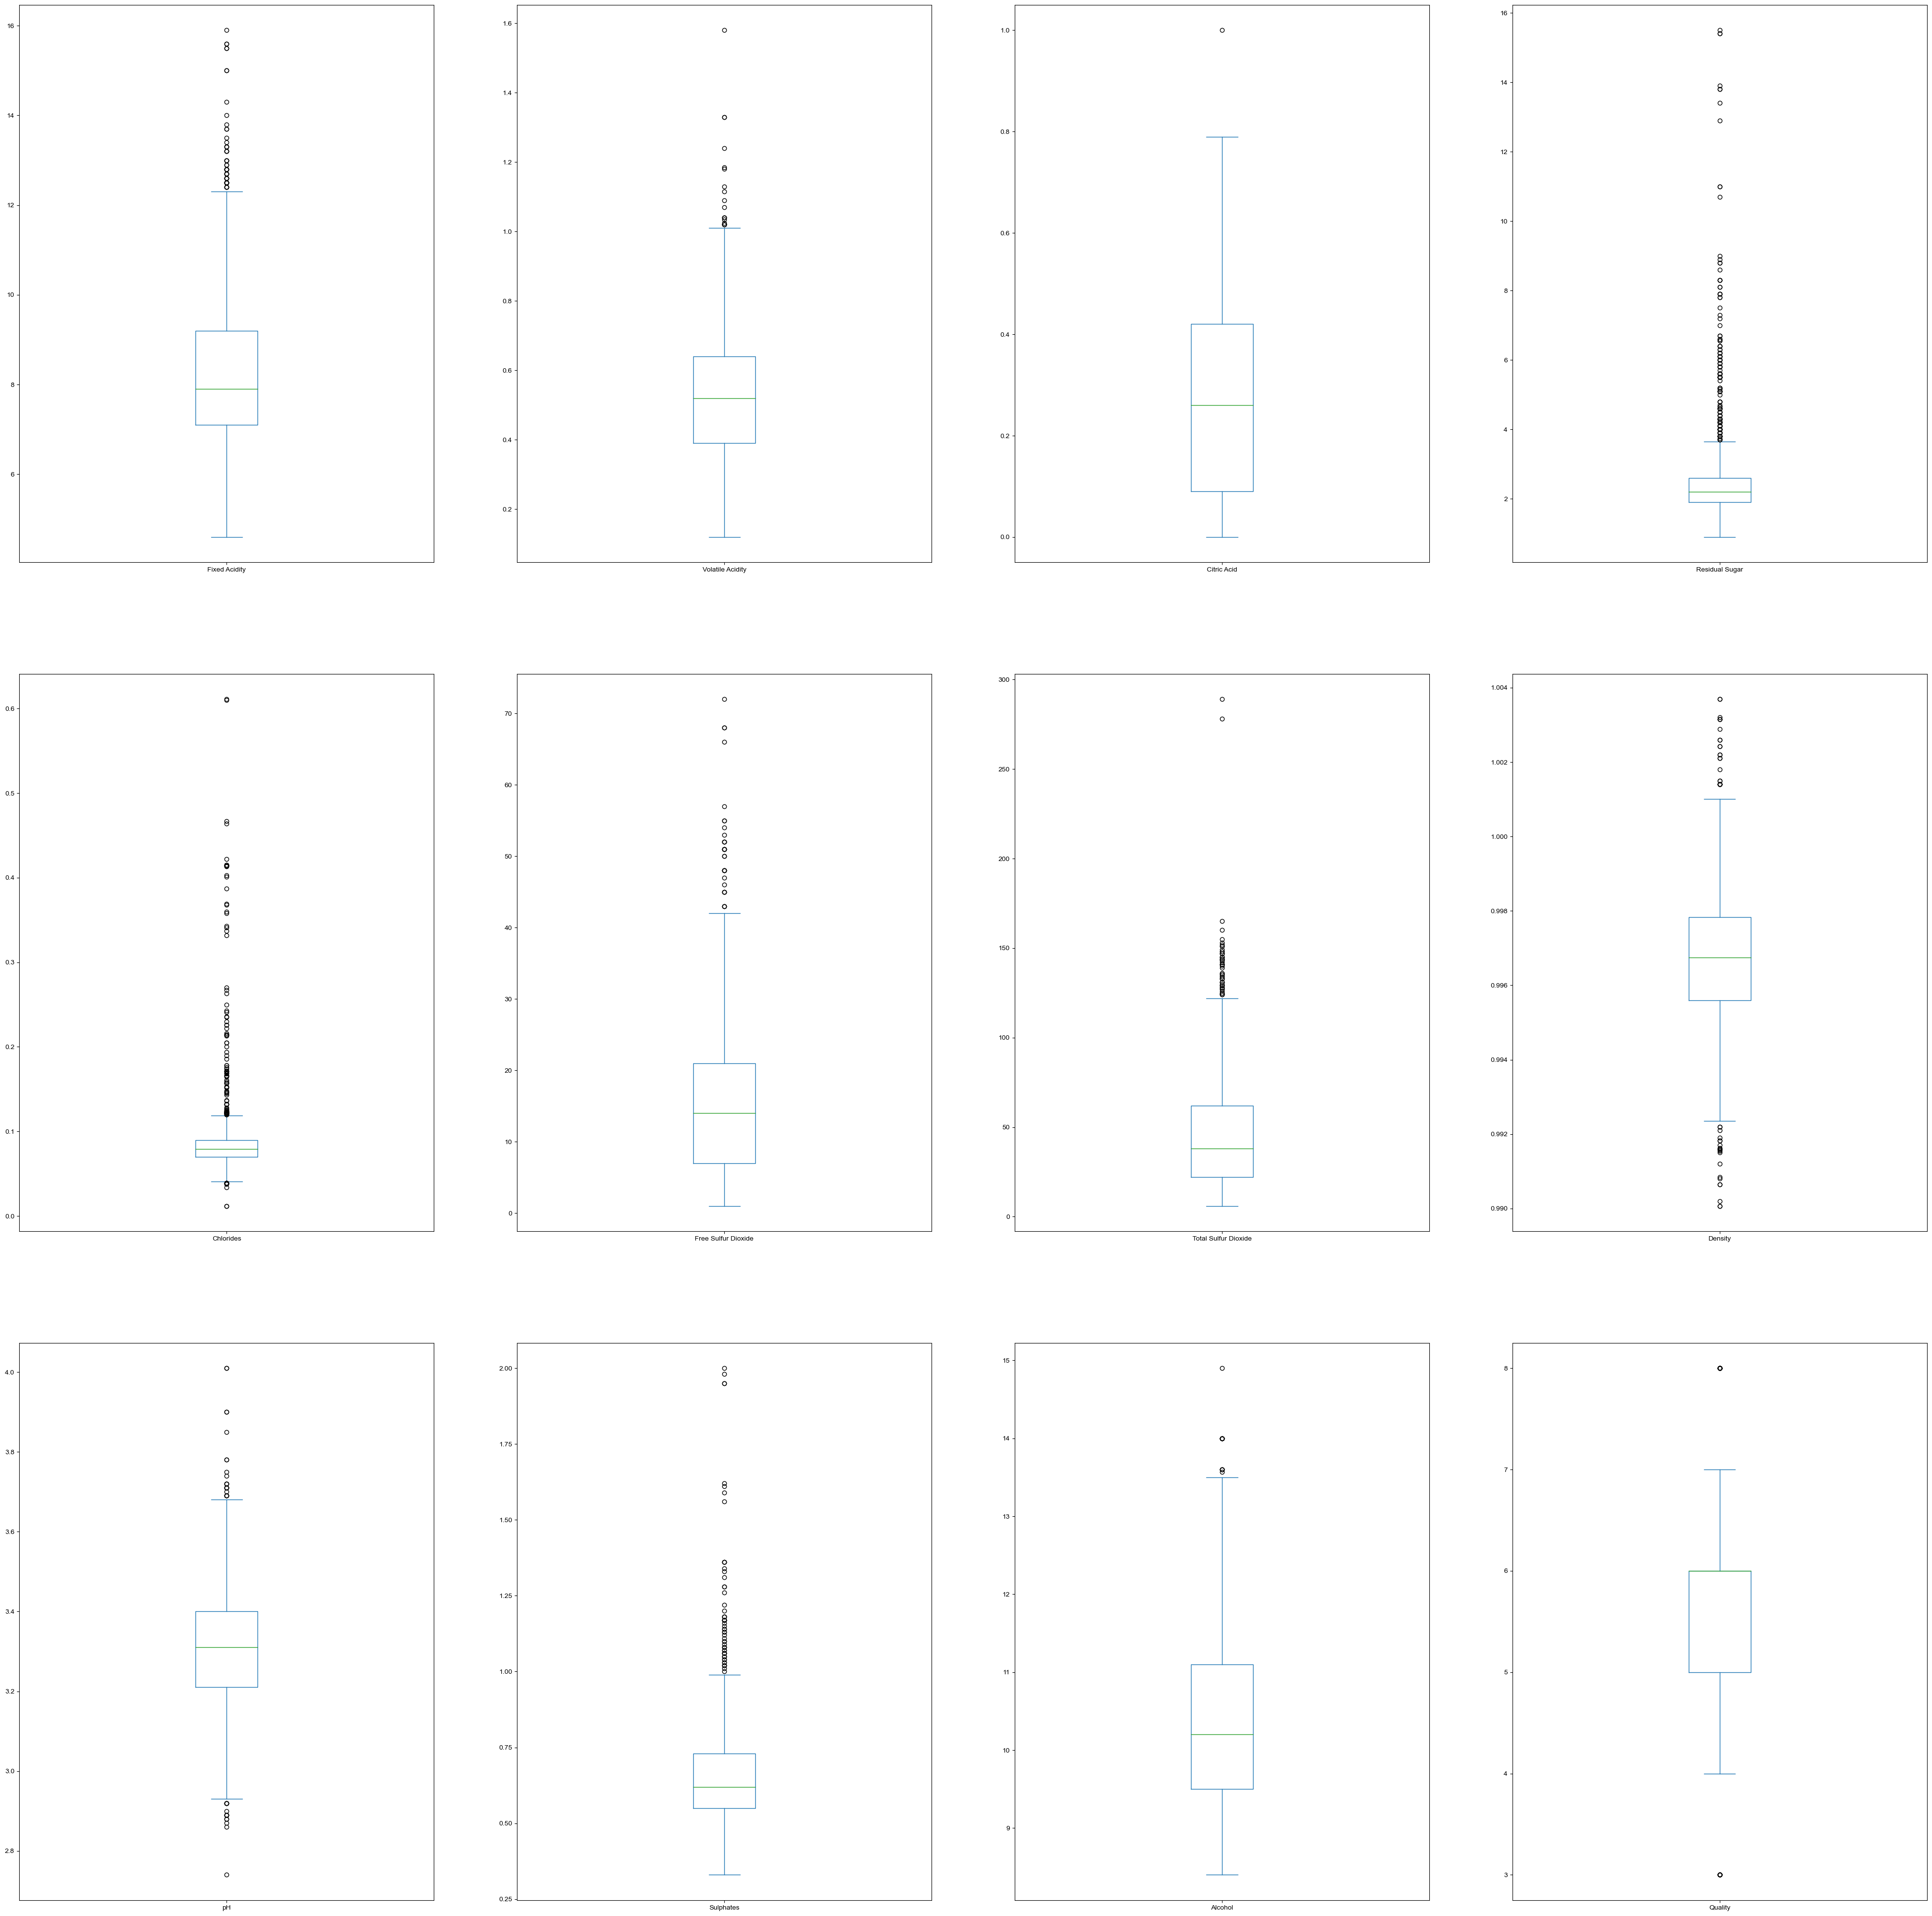

In [20]:
df.plot(kind= 'box' , subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(50,50))
sns.set(font_scale = 3)

In [21]:

def identify_outliers(df, column_name):
    q25, q75 = np.percentile(df[column_name], 25), np.percentile(df[column_name], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = [x for x in df[column_name] if x < lower or x > upper]
    return len(outliers)


# Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [23]:
scaled_data

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

# Model Selection 

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

# Split data into features (X) and target (y)
X = df.drop('Quality', axis=1)
y = df['Quality']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models_train, predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test, predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Print the models and their accuracy on the test set
print(models_test)


 93%|████████████████████████████████████████████████████████████████████████████▎     | 27/29 [00:04<00:00,  7.05it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1022
[LightGBM] [Info] Number of data points in the train set: 1279, number of used features: 11
[LightGBM] [Info] Start training from score -4.956609
[LightGBM] [Info] Start training from score -3.392634
[LightGBM] [Info] Start training from score -0.842099
[LightGBM] [Info] Start training from score -0.927297
[LightGBM] [Info] Start training from score -2.097588
[LightGBM] [Info] Start training from score -4.588884
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:05<00:00,  5.17it/s]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [00:03<00:00,  8.79it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1022
[LightGBM] [Info] Number of data points in the train set: 1279, number of used features: 11
[LightGBM] [Info] Start training from score -4.956609
[LightGBM] [Info] Start training from score -3.392634
[LightGBM] [Info] Start training from score -0.842099
[LightGBM] [Info] Start training from score -0.927297
[LightGBM] [Info] Start training from score -2.097588
[LightGBM] [Info] Start training from score -4.588884
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:04<00:00,  6.39it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.70               0.36    None      0.69   
ExtraTreesClassifier               0.69               0.34    None      0.67   
LabelPropagation                   0.62               0.33    None      0.62   
LabelSpreading                     0.62               0.33    None      0.62   
RandomForestClassifier             0.66               0.33    None      0.64   
BaggingClassifier                  0.65               0.32    None      0.63   
GaussianNB                         0.55               0.31    None      0.54   
ExtraTreeClassifier                0.60               0.30    None      0.59   
BernoulliNB                        0.58               0.29    None      0.57   
QuadraticDiscriminantAnalysis      0.56               0.29    None      0.55   
DecisionTreeClassifier             0.56 

In [25]:
import pandas as pd


columns_to_remove = ['Residual Sugar', 'Free Sulfur Dioxide', 'pH', 'Chlorides', 'Density', 'Volatile Acidity']

df.drop(columns=columns_to_remove, inplace=True)

print("DataFrame after removing specified columns:")
print(df)


DataFrame after removing specified columns:
      Fixed Acidity  Citric Acid  Total Sulfur Dioxide  Sulphates  Alcohol  \
1              7.40         0.00                 34.00       0.56     9.40   
2              7.80         0.00                 67.00       0.68     9.80   
3              7.80         0.04                 54.00       0.65     9.80   
4             11.20         0.56                 60.00       0.58     9.80   
5              7.40         0.00                 34.00       0.56     9.40   
...             ...          ...                   ...        ...      ...   
1595           6.20         0.08                 44.00       0.58    10.50   
1596           5.90         0.10                 51.00       0.76    11.20   
1597           6.30         0.13                 40.00       0.75    11.00   
1598           5.90         0.12                 44.00       0.71    10.20   
1599           6.00         0.47                 42.00       0.66    11.00   

      Quality  
1  

# Model Training

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df.drop(['Quality'], axis=1)
Y = df['Quality']

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1000)

# fit the model to the training set
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.4875


# Model Evaluation

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

In [28]:
print("Precision for each class:", precision)
print("Recall for each class:", recall)
print("F1-score for each class:", f1)


Precision for each class: [0.         0.         0.63076923 0.45098039 0.         0.        ]
Recall for each class: [0.         0.         0.31538462 0.87121212 0.         0.        ]
F1-score for each class: [0.         0.         0.42051282 0.59431525 0.         0.        ]


In [29]:
accuracy = accuracy_score(y_test, y_pred)
print('Overall accuracy:', accuracy)

Overall accuracy: 0.4875


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00        10
         5.0       0.63      0.32      0.42       130
         6.0       0.45      0.87      0.59       132
         7.0       0.00      0.00      0.00        42
         8.0       0.00      0.00      0.00         5

    accuracy                           0.49       320
   macro avg       0.18      0.20      0.17       320
weighted avg       0.44      0.49      0.42       320



# AFTER DROPPING COLUMN ONE BY ONE

In [32]:
df3=df.copy()
df3.drop(columns=['Alcohol'], inplace=True)


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df3.drop(['Quality'], axis=1)
y = df3['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training set
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.4594


# KFOLD VALIDATION

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Assuming df contains your entire dataset

# Split data into features (X) and target variable (Y)
X = df.drop(['Quality'], axis=1)
Y = df['Quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Instantiate the model
knn = KNeighborsClassifier(n_neighbors=1000)

# Define Cross-Validation Strategy
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform Cross-Validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')

# Display Results
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-validation Accuracy Scores: [0.890625   0.859375   0.875      0.85546875 0.85490196]
Mean Accuracy: 0.8670741421568626


# FINAL RESULT

In this project, I built a k-Nearest Neighbors model for predicting wine quality. Initially, I achieved an accuracy of 45%. However, despite increasing the number of neighbors or dropping columns, there was no improvement in accuracy. Surprisingly, even after performing these modifications simultaneously, the accuracy remained unchanged. However, upon utilizing k-fold cross-validation, we observed a mean accuracy of 86%.